In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.linear_model import Lasso 
from sklearn.datasets import  make_regression 
from sklearn.model_selection import train_test_split 

In [3]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

x_test,x_train,y_test, y_train = train_test_split(x,y,test_size=0.2)

[29.44125085]
0.46500475478398845


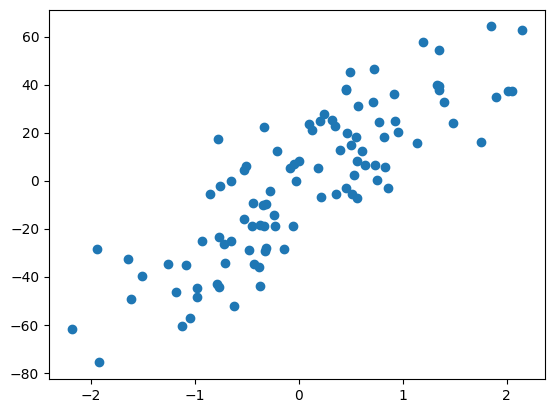

In [6]:
plt.scatter(x,y)

from sklearn.linear_model import LinearRegression

ls = LinearRegression()
ls.fit(x_train,y_train)
print(ls.coef_)
print(ls.intercept_)

d:\machine learning\ml-campus\.venv\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\machine learning\ml-campus\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\machine learning\ml-campus\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.239e+03, tolerance: 2.353e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

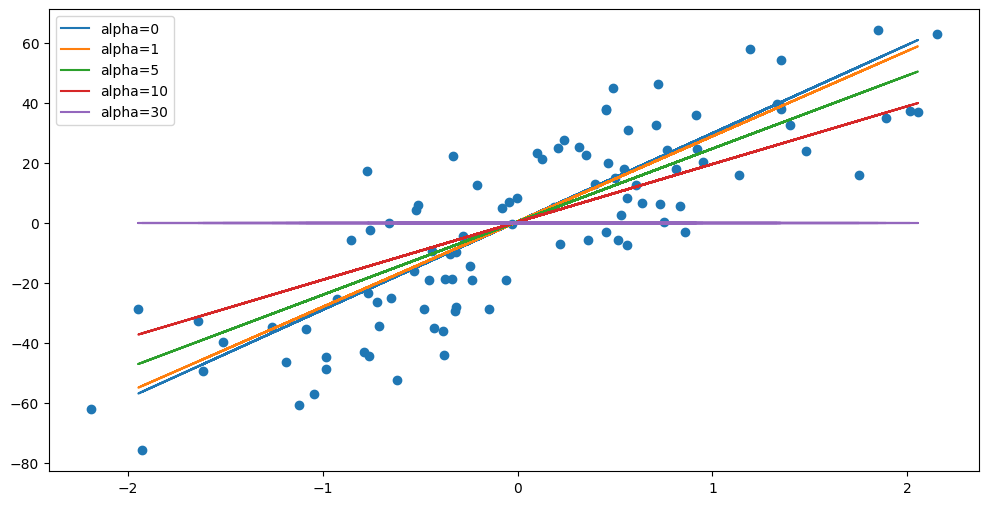

In [10]:
## Appling Lasso Regression 


alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(x,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(x_train,y_train)
    plt.plot(x_test,L.predict(x_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

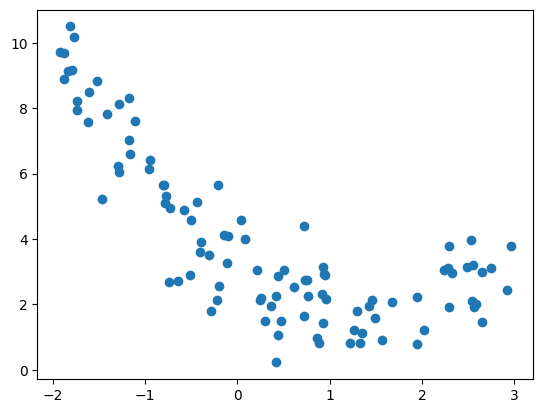

In [11]:
m = 100 
x1 = 5 * np.random.rand(m,1) - 2
x2 =  0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

d:\machine learning\ml-campus\.venv\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\machine learning\ml-campus\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\machine learning\ml-campus\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.398e+01, tolerance: 6.653e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

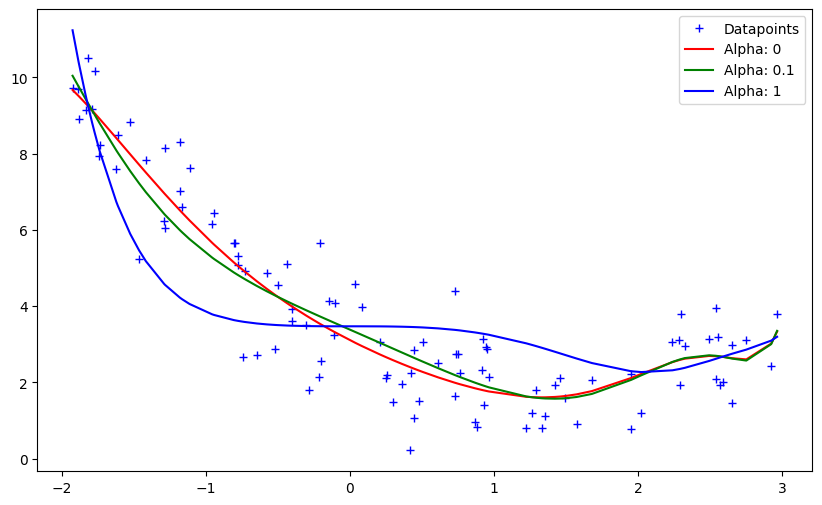

In [15]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

# Example data (replace with your actual dataset)
data = pd.DataFrame({
    'name': ['Corolla', 'Civic', 'Accord', 'Camry', 'Altima', 'Civic', 'Corolla'],
    'company': ['Toyota', 'Honda', 'Honda', 'Toyota', 'Nissan', 'Honda', 'Toyota'],
    'kms_driven': [50000, 30000, 40000, 25000, 60000, 35000, 80000],
    'year': [2015, 2017, 2016, 2018, 2014, 2017, 2013],
    'price': [12000, 14000, 13000, 15000, 11000, 13500, 9000]
})

# Features and target
X = data[['name', 'company', 'kms_driven', 'year']]
y = data['price']

# Preprocessing (same for all models)
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['name', 'company']),
    ('num', StandardScaler(), ['kms_driven', 'year'])
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with hyperparameters 
models = {
    'Ridge': Ridge(alpha=1.0),               # L2 regularization
    'Lasso': Lasso(alpha=0.1),               # L1 regularization
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)  # Combined L1 + L2
}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nModel: {name}")
    print(f"R² Score: {r2:.4f}")
    print("Predicted vs Actual:\n", pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))


: 